## LOAD

In [68]:
# import pickle5 as pickle
#import pickle5 as pickle
import pickle as pkl
import pickle
from numpy import linalg as LA
import numpy as np
import scipy as sp
import torch as th
import torchvision as TV
from torchvision import transforms
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
import os, pdb, sys, json, glob, tqdm
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

sns.set_context('notebook')

%matplotlib inline
plt.rcParams['figure.figsize'] = [4,4]
plt.rcParams['figure.dpi'] = 200
# %config InlineBackend.figure_format ='retina'

%load_ext autoreload
%autoreload 2

#dev = 'cuda'
dev='cpu'
from utils import get_data



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#load data
#loc=r'C:\Users\Itay Griniasty\Box\InPCApath\inpca\results\models\new'
#loc=r'/Users/itaygr/Google Drive/InPCApath/inpca/results/models/new'
loc=r'G:\My Drive\InPCApath\inpca\results\models\new'

data = {}
i=0  #0 = all_models, 1 = avg_models,2 =avg_models_clean
for f in glob.glob(os.path.join(loc, '*.pkl')):
    file = open(f,'rb')
    d = pickle.load(file)
    data[i] = d
    i+=1

In [41]:
# '''loc_results='/Users/itaygr/Documents/InPCApath/inpca/results/inpca_results'

# data_dist = {}
# i=0  # 0 =yh, 1=yvh (verification)
# for f in glob.glob(os.path.join(loc_results, 'w*')):
#     file = open(f,'rb')
#     d = th.load(file)
#     data_dist[i] = d
#     i+=1

# data_r = {}
# i=0  # 0 =rh, 1=rvh (verification)
# for f in glob.glob(os.path.join(loc_results, 'r*')):
#     file = open(f,'rb')
#     d = th.load(file)
#     data_r[i] = d
#     i+=1

# data_didx = {}
# i=0  # 0 =didxh, 1=didxvh (verification)
# for f in glob.glob(os.path.join(loc_results, 'd*')):
#     file = open(f,'rb')
#     d = th.load(file)
#     data_didx[i] = d
#     i+=1
# '''

In [71]:
# load ground_truth = labels of images
cifar10classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

transform = transforms.Compose( [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
      (0.5, 0.5, 0.5))])

trainset = TV.datasets.CIFAR10(root='.\\data', train=True,
    download=True, transform=transform)

trainloader = th.utils.data.DataLoader(trainset,
    batch_size=1000, shuffle=False, num_workers=1)

_,label=trainset[1]
label

i=0
ground_truth=[]
for i in range(len(trainset)):
    _,label=trainset[i]
    ground_truth.append(label)

# get first 1000 training images
dataiter = iter(trainloader)
imgs, lbls = dataiter.next()


# show images
def imshow(img):
  img = TV.utils.make_grid(imgs[img]) / 2 + 0.5   # unnormalize
  npimg = img.numpy()   # convert from tensor
  plt.imshow(np.transpose(npimg, (1, 2, 0))) 
  plt.show()

Files already downloaded and verified


In [113]:
ptmp1=data[0]['yh'][0]
ptmp2=data[0]['yh'][19]
ptmp1.shape
#-np.log(np.sum(np.sqrt(ptmp1)*np.sqrt(ptmp2))
-np.log(np.sum(np.sqrt(ptmp1)*np.sqrt(ptmp1)))

-10.819778

In [121]:
data0=data[0]
data01=data0[(data0['m']=='allcnn-96-144')&(data0['opt']=='sgd')&(data0['bn']==True)&(data0['seed']==seeds[0])]
datasgd=data0[(data0['opt']=='sgd')&(data0['bn']==True)]

In [120]:
pt0=np.array(datasgd[data01['t']==19]['yh'])[0]
pt1=np.array(datasgd[data01['t']==0]['yh'])[0]
iskl(pt0,pt1)

128675.546875

In [115]:
np.sqrt(dskl_sgd[1,2])

59.35115063780356

In [125]:
ptmp1=np.array(datasgd['yh'])[0]
ptmp2=np.array(datasgd['yh'])[1]

In [135]:
len(np.sum(ptmp1).shape)

0

In [136]:
def bhat(p1,p2) :
    if len(np.sum(p1,1).shape)==2:
        return np.sum((-np.log(np.sum(np.sqrt(p1*p2),1))))
    else : 
        return -np.log(np.sum(np.sqrt(p1*p2)))

In [76]:
## data range
models = np.array(['allcnn-96-144', 'fc-1024-512-256-128', 'wr-4-8'], dtype=object)
optimizers = np.array(['adam', 'sgd', 'sgdn'], dtype=object)
seeds = np.array([42, 43, 44, 45, 46, 47, 48, 49, 50, 51])
times = range(20)
batchnormalizations = np.array([False,  True])

In [75]:
largeNumber=10**12
##ISKL distance
def kl(p1, p2) :
    # p1 and p2 are np arrays of size nx1
    p1=np.array(p1)
    p2=np.array(p2)
    if np.all(p1>0) & np.all(p2>0):
        return np.sum(p1*(np.log(p1)-np.log(p2)))
    else:
        tmp=0
        for j in range(len(p1)):
            if p1[j]>0 & p2[j]>0:
                tmp+=p1[j]*(np.log(p1[j])-np.log(p2[j]))
            elif p1[j]==0:
                tmp+=0
            elif p1[j]>0 & p2[j]==0:
                tmp+=p1[j]*(np.log(p1[j])-largeNumber)
        return tmp

def iskl(p1, p2) :
    # p1 and p2 are np arrays of size nx1
    p1=np.array(p1)
    p2=np.array(p2)
    #return 0.5*(kl(p1,p2)+kl(p2,p1))
    return .5*np.sum((p1-p2)*(np.log(p1)-np.log(p2)))

SyntaxError: invalid syntax (<ipython-input-75-5adb99ed564a>, line 26)

In [77]:
def plot3D(px,py,pz,clist,emphPoints = [],cmap='plasma',shadow=False,useCMAP = True):
    
    elev = 30
    azim = 60

    viewVect = [np.cos(np.pi*180/elev)*np.sin(np.pi*180/azim),np.cos(np.pi*180/elev)*np.cos(np.pi*180/azim),np.cos(np.pi*180/elev)]

    p = np.array([px,py,pz])
    dots = np.array(np.dot(viewVect,p))
    sort = dots.argsort()

    px = px[sort]
    py = py[sort]
    pz = pz[sort]
    clist = np.array(clist)[sort]

    mean_x = px.min()
    mean_y = py.min()
    mean_z = pz.min()

    Xdist = px.max() - px.min()
    Xcntr = (px.max() + px.min())/2.0
    Ydist = py.max() - py.min()
    Ycntr = (py.max() + py.min())/2.0
    Zdist = pz.max() - pz.min()
    Zcntr = (pz.max() + pz.min())/2.0

    dist = 0.6*max(Xdist,Ydist,Zdist)

    fig = plt.figure(figsize = (10,10))
    ax = fig.gca(projection='3d')
    #ax.view_init(30,-60)

    listTemp = [i for i in range(len(px))]

    if useCMAP:
        ax.scatter(px,py,pz,c=clist,edgecolor='black',linewidth=0.2,cmap = cmap)
    else:
        ax.scatter(px,py,pz,c=clist,edgecolor='black',linewidth=0.2)
    
    for p in emphPoints:
        ax.scatter([px[p]],[py[p]],[pz[p]],c='C1',s=100)

    ax.set_xlim([Xcntr - dist, Xcntr + dist])
    ax.set_ylim([Ycntr - dist, Ycntr + dist])
    ax.set_zlim([Zcntr - dist, Zcntr + dist])

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    #ax.set_axis_off()
    #plt.show()
    
    if shadow:
        #fig = plt.figure(figsize = (10,10))
        #ax = fig.gca(projection='3d')
        #ax.view_init(30,-60)
        
        ax.scatter(px,py,[Zcntr - dist for p in pz],c='black',alpha=0.01)
        ax.scatter(px,[Ycntr + dist for p in py],pz,c='black',alpha=0.01)
        ax.scatter([Xcntr - dist for p in px],py,pz,c='black',alpha=0.01)

        ax.set_xlim([Xcntr - dist, Xcntr + dist])
        ax.set_ylim([Ycntr - dist, Ycntr + dist])
        ax.set_zlim([Zcntr - dist, Zcntr + dist])

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        #ax.set_axis_off()
    plt.show()
    
def trianglePlot(arry,metric_sig,clist,emphPoints = [],dim=2):
    
    ranges = [arry[:,idx].max()-arry[:,idx].min() for idx in range(dim+1)]
    axesDist = 0.6*max(ranges)
    
    figs,axs = plt.subplots(nrows=dim,ncols=dim,figsize=(15,15))
    for row in range(dim-1,-1,-1):
        for col in range(dim-1,-1,-1):
            if col >= row:
                py = arry[:,row]
                px = arry[:,col+1]
                
                centerX = (px.max()+px.min())/2
                centerY = (py.max()+py.min())/2
                
                sc1 = axs[row,col].scatter(px,py,s=5,c=clist,edgecolor='black',linewidth=0.2, cmap='plasma')
                for p in emphPoints:
                    axs[row,col].scatter([px[p]],[py[p]],s=100,c='C1',edgecolor='black',linewidth=0.2)
                
                axs[row,col].set_xlim([centerX-axesDist,centerX+axesDist])
                axs[row,col].set_ylim([centerY-axesDist,centerY+axesDist])
                if row != col:
                    axs[row,col].set_xticks([])
                    axs[row,col].set_yticks([])
                if row == col:
                    axs[row,col].set_ylabel('direction '+str(row+1))
                    axs[row,col].set_xlabel('direction '+str(col+2))
                    if metric_sig[row]<0:
                        axs[row,col].yaxis.label.set_color('red')
                    if metric_sig[col+1]<0:
                        axs[row,col].xaxis.label.set_color('red')
                axs[row,col].ticklabel_format(style='sci',scilimits=(-2,2),axis='both')
            else:
                axs[row,col].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [353]:
# # Create data

### random samples
#samplesize=500
#randsamp=random.sample(range(50000),samplesize)

# data0Tsgd=data[0][(data[0]['bn']==True)&(data[0]['opt']=='sgd')]

# number_of_models_2=len(models)*len(seeds)*len(times)
# dskl_sgd=np.zeros((number_of_models_2,number_of_models_2))
        
# for i_model1,model1 in zip(range(len(models)),models):
#             for i_seed1,seed1 in zip(range(len(seeds)),seeds):
#                 for t1 in times:
#                     for i_model2,model2 in zip(range(len(models)),models):
#                             for i_seed2,seed2 in zip(range(len(seeds)),seeds):
#                                 for t2 in times:
#                                     i1=i_model1*len(seeds)*len(times)+i_seed1*len(times)+t1
#                                     i2=i_model2*len(seeds)*len(times)+i_seed2*len(times)+t2
#                                     if i1>=i2:
#                                         p1=np.array(data0Tsgd[(data0Tsgd['m']==model1)&(data0Tsgd['seed']==seed1)&(data0Tsgd['t']==t1)]['yh'])[0]
#                                         p2=np.array(data0Tsgd[(data0Tsgd['m']==model2)&(data0Tsgd['seed']==seed2)&(data0Tsgd['t']==t2)]['yh'])[0]
#                                         dskl_sgd[i1,i2]=iskl(p1,p2)
#                                     else:
#                                         dskl_sgd[i1,i2]=dskl_sgd[i2,i1]

# #save data                                        
# file_dskl_sgd = open("dskl_sgd.obj", "wb") 
# pickle.dump(dskl_sgd, file_dskl_sgd, protocol=pickle.HIGHEST_PROTOCOL)

In [143]:
samplesize=5
randsamp=random.sample(range(50000),samplesize)

In [144]:
ptmp1[randsamp].shape

(5, 10)

In [ ]:
#save data                                        
pickle.dump(Dbhat_sgd, open("Dbhat_sgd.obj", "wb") )
#dskl_sgd2 = pickle.load( open( "dskl_sgd2.p", "rb" ) )

-10.574691772460938

In [78]:
dskl_sgd = pickle.load( open("dskl_sgd.obj", "rb") )

In [79]:

dskl_sgd2 = pickle.load( open( "dskl_sgd2.p", "rb" ) )

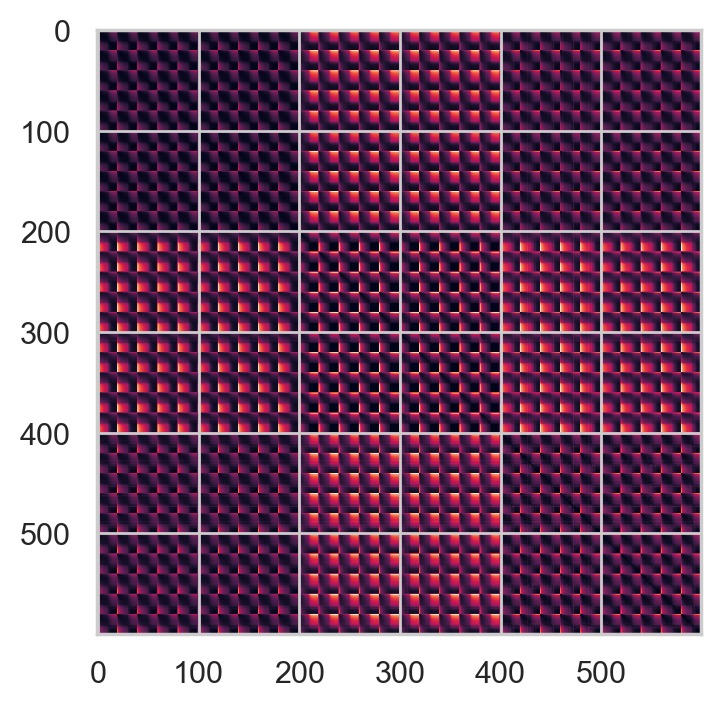

In [80]:
plt.imshow(dskl_sgd)

In [357]:
# dskl_sgd2=dskl_sgd
# for i in range (len(dskl_sgd)):
#     for j in range (len(dskl_sgd)):
#         if i<j:
#             dskl_sgd2[i,j]=dskl_sgd[j,i]

In [111]:
## to embed define p matrix = 1 -delta ij / number of samples
number_of_models=len(dskl_sgd)
P=np.eye(number_of_models)-np.ones((number_of_models,number_of_models))/number_of_models
## covariance matric P.dskl.P
CovMat_kl_sgd=-.5*np.matmul(np.matmul(P,dskl_sgd2),P)
## eigen value decomposition

from numpy import linalg as LA
w_kl,vt_kl = LA.eig(CovMat_kl_sgd)
metric_sig_kl=np.sign(w_kl.real)
print(w_kl[0:15])
w_kl = abs(w_kl.real)
v_kl = vt_kl.T.real
projMatEigs_kl = np.dot(v_kl.T,np.diag(np.sqrt(w_kl)))

[13153226.25294518  1472375.00104711   673603.84949511  -494854.44527972
   255787.82519443   224742.58017821   156148.53507473  -134909.54088462
   128665.57773597    94562.94975141    71532.34142351    66697.12023865
    56482.9787793     52189.53188054    49152.2175719 ]


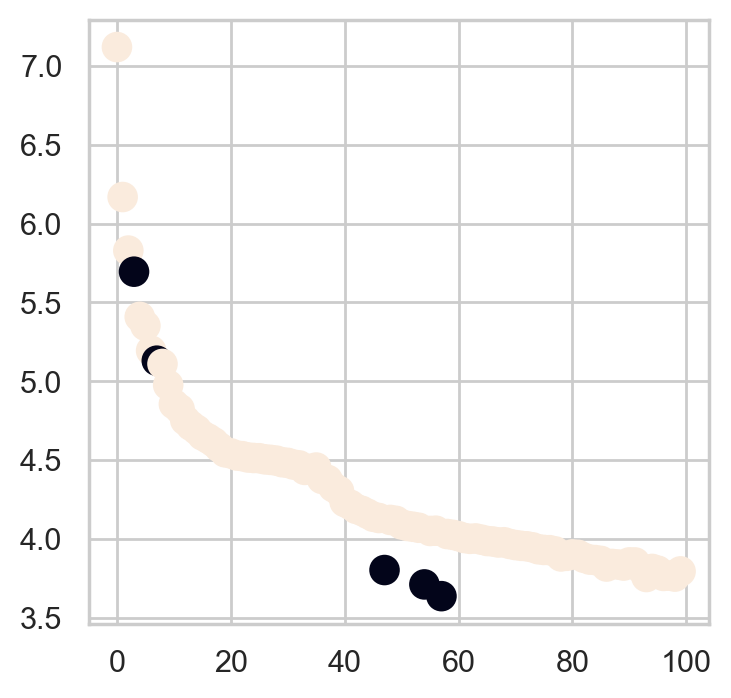

In [82]:
plt.scatter(np.arange(100),np.log(w_kl[:100])/np.log(10),100,metric_sig_kl[:100])
#plt.scatter(np.arange(100),w_kl[:100])

In [83]:
sum(abs(w_kl[:3]))/sum(abs(w_kl))

0.8049467884403753

In [84]:
sum(np.sqrt(abs(w_kl[:3])))/sum(np.sqrt(abs(w_kl)))

0.17171491608518968

In [85]:
w_kl[:4]/w_kl[:1]

array([1.        , 0.11194022, 0.05121206, 0.03762229])

In [87]:
# color by models
# i1=i_model1*len(seeds)*len(times)+i_seed1*len(times)+t1
dskl_sgd.shape

(600, 600)

In [88]:
model_colors = [0]*200+[1]*200+[2]*200
time_colors=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]*30
time_opacity=(np.array(time_colors)+1)/20

Color by Model
Blue = cnn, Red = fc, Yellow = resnet


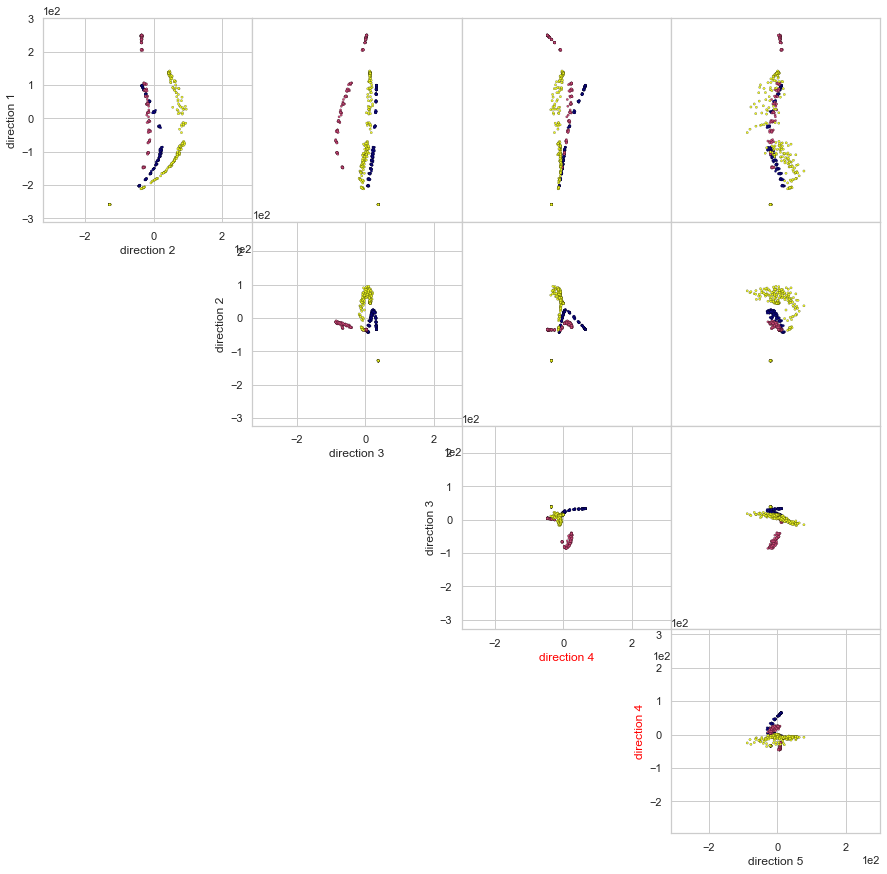

In [117]:
print('Color by Model')
print('Blue = cnn, Red = fc, Yellow = resnet')

trianglePlot(projMatEigs_kl,metric_sig_kl,model_colors,dim=4)

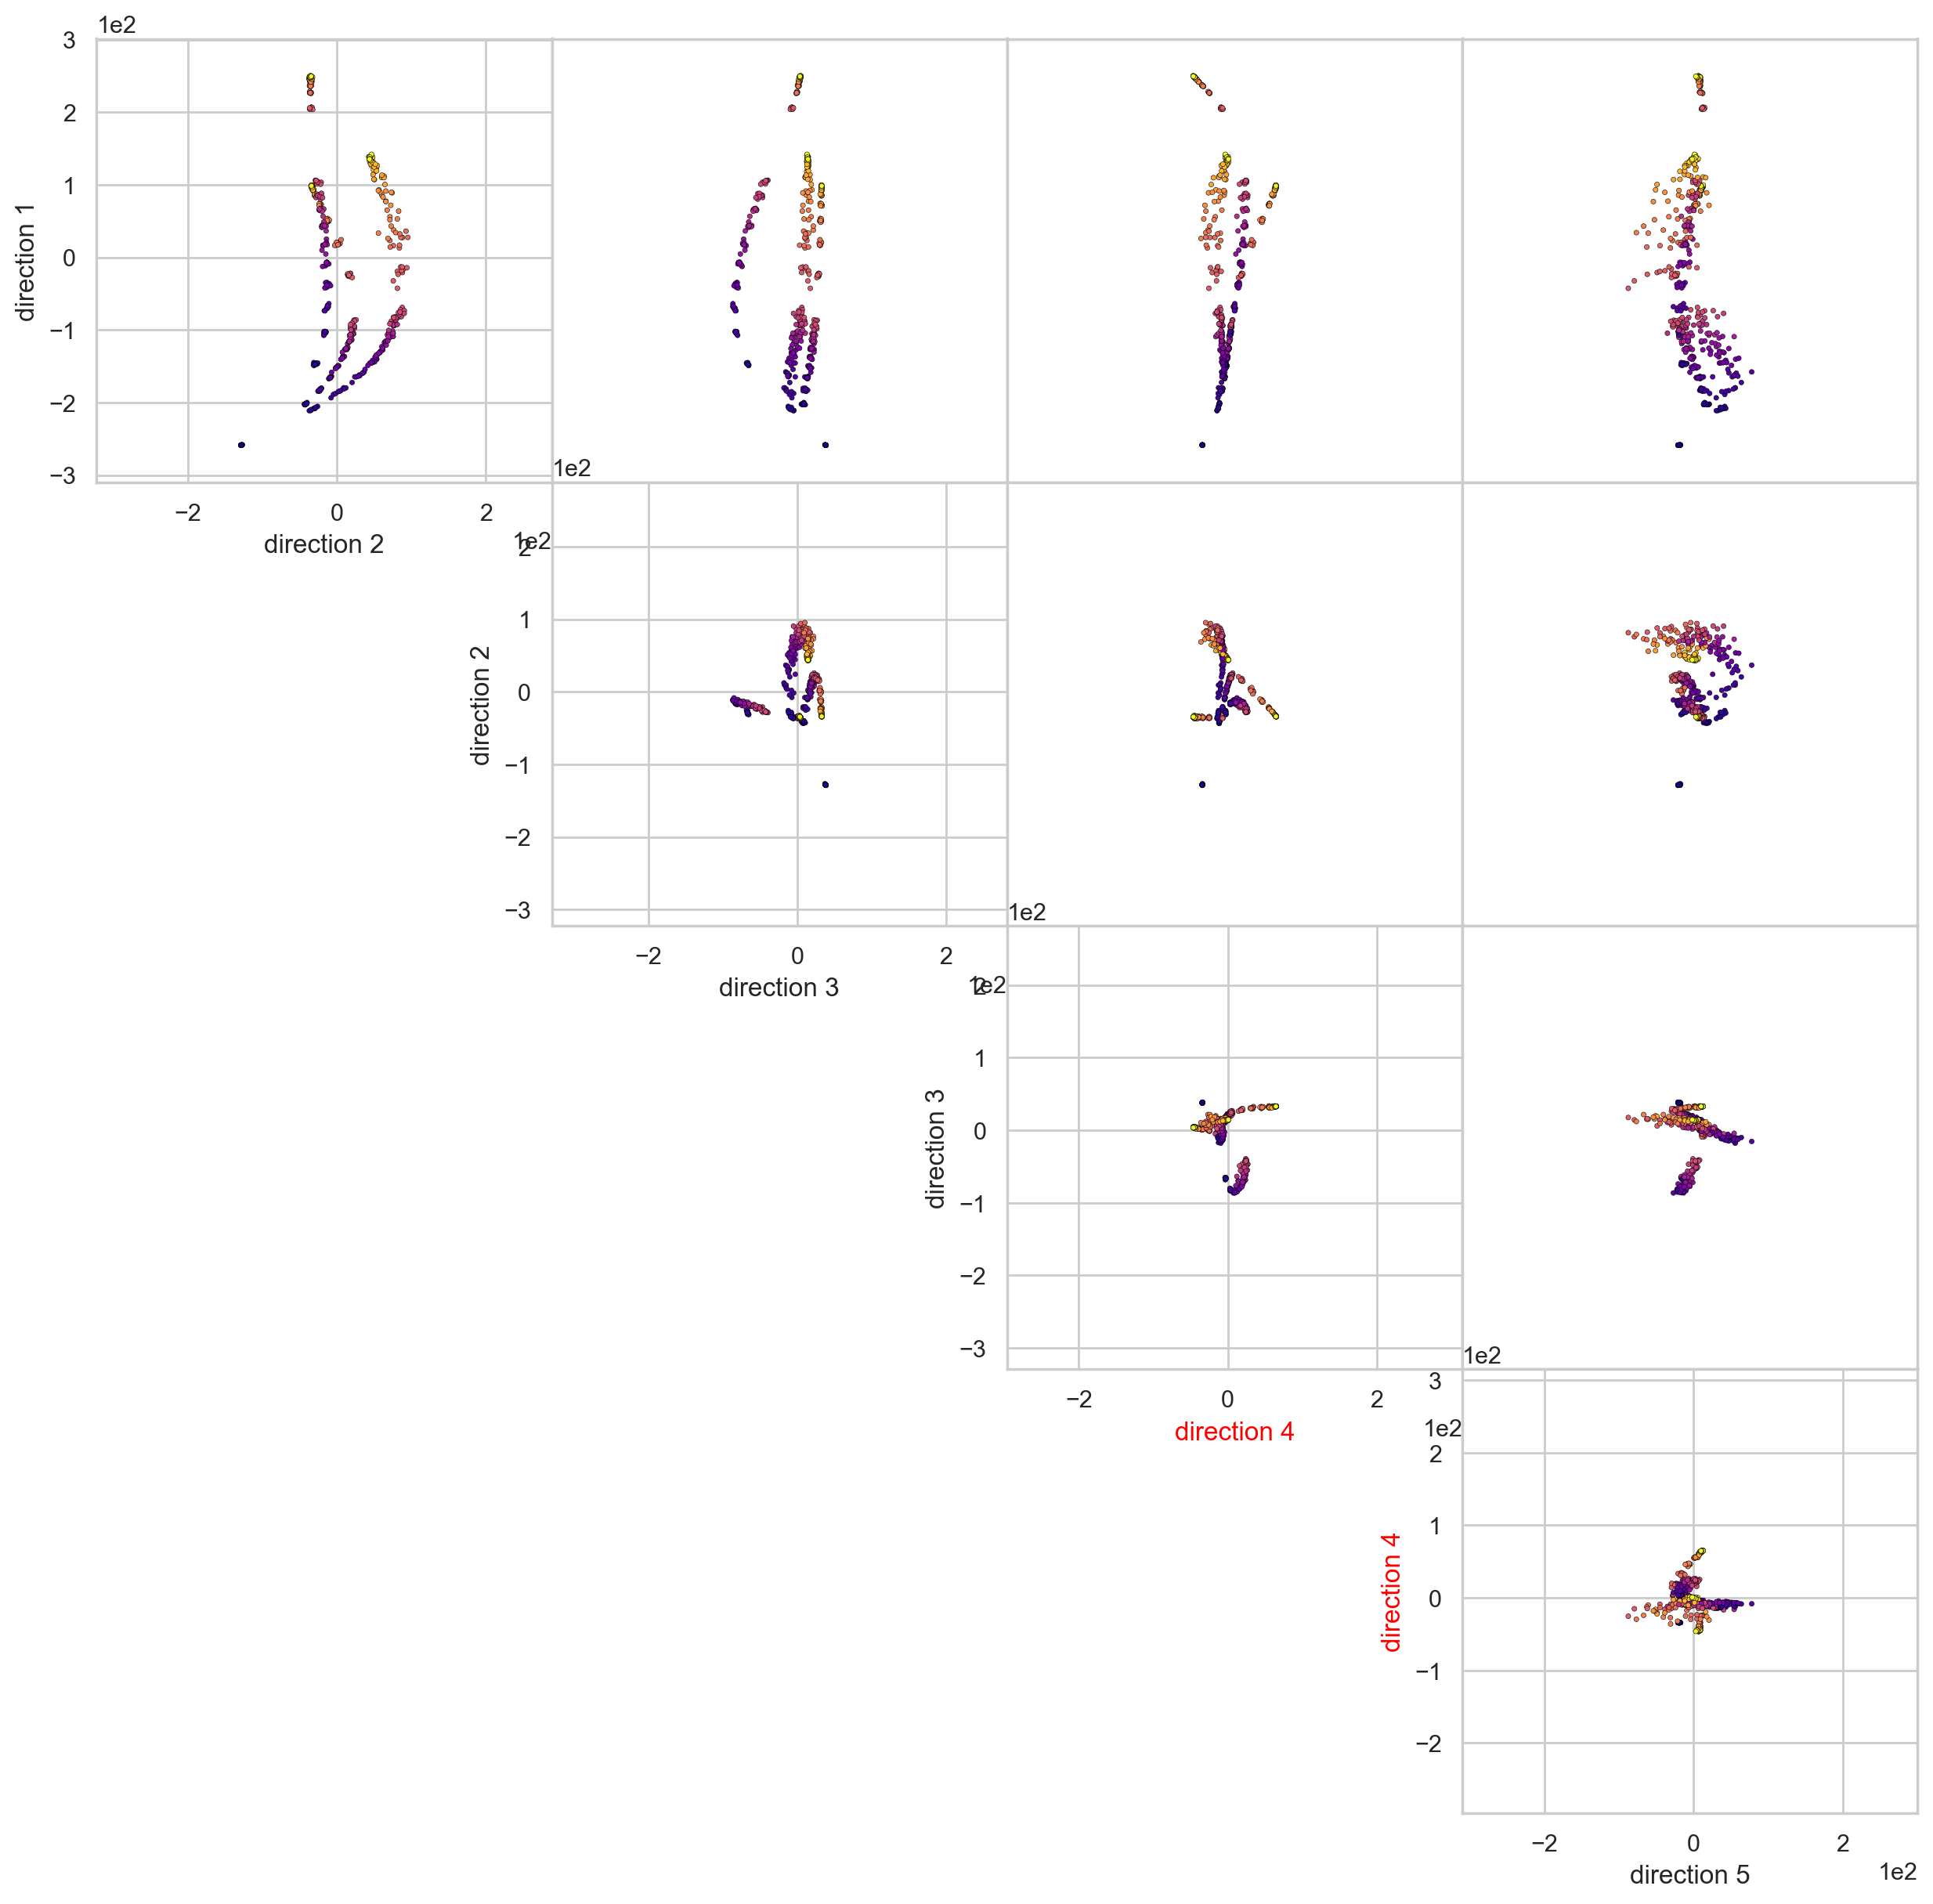

In [90]:
trianglePlot(projMatEigs_kl,metric_sig_kl,time_colors,dim=4)

Color by Model
Blue = cnn, Red = fc, Yellow = resnet


<IPython.core.display.Javascript object>


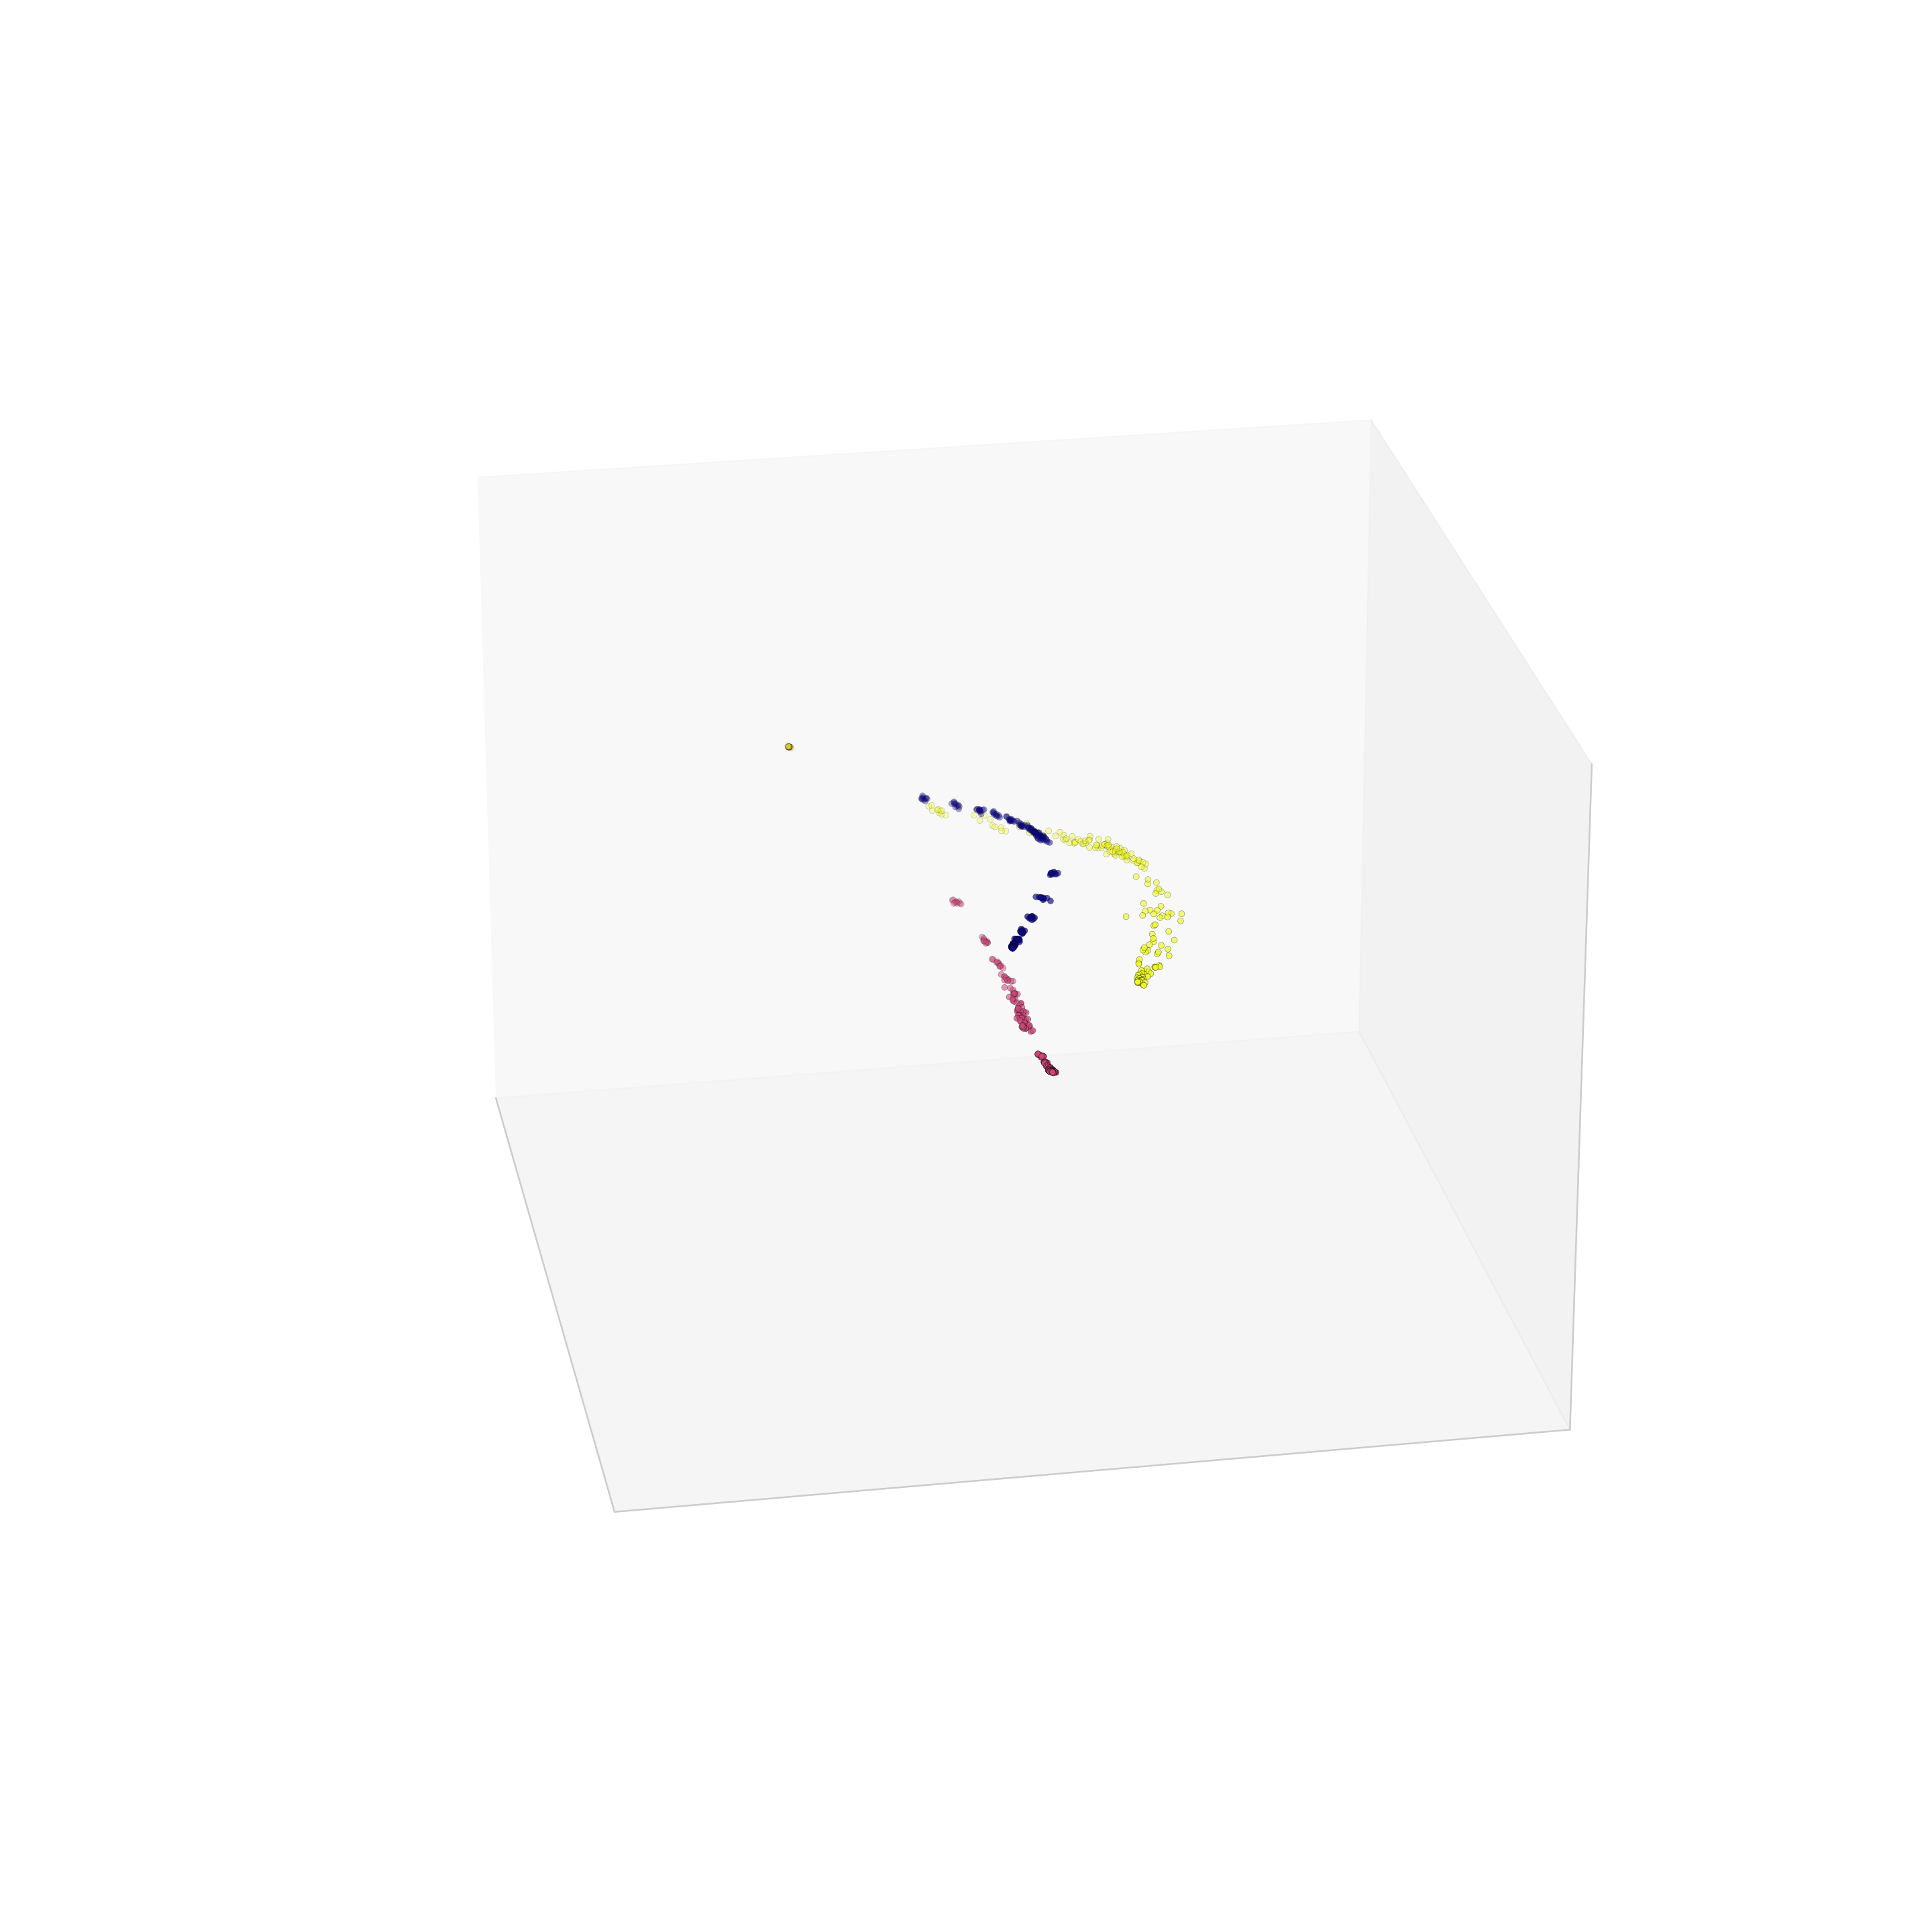

/Users/itaygr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


In [204]:
print('Color by Model')
print('Blue = cnn, Red = fc, Yellow = resnet')
%matplotlib notebook
#%matplotlib inline

plot3D(projMatEigs_kl[:,0],projMatEigs_kl[:,1],projMatEigs_kl[:,2],model_colors,cmap='plasma',shadow=False,useCMAP = True)

In [205]:
len(seeds)

10

Color by Time


/Users/itaygr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


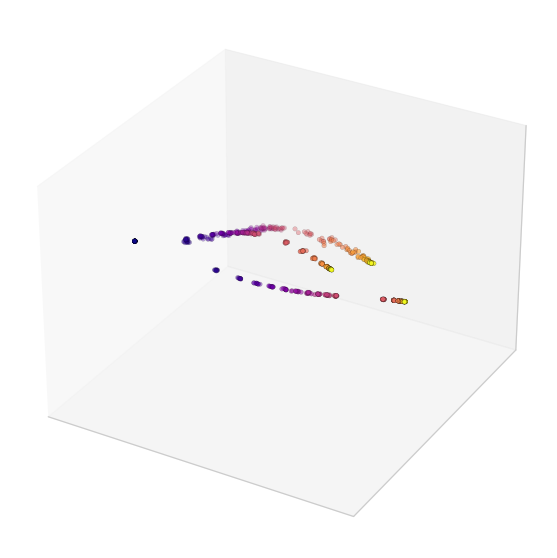

In [93]:
print('Color by Time')
#%matplotlib notebook
plot3D(projMatEigs_kl[:,0],projMatEigs_kl[:,1],projMatEigs_kl[:,2],time_colors,shadow=False,useCMAP = True)
#%matplotlib inline

## Bhatacharyah (inPCA)

In [ ]:
def bhat(p1,p2) :
    if len(np.sum(p1,1).shape)==2:
        return np.sum((-np.log(np.sum(np.sqrt(p1*p2),1))))
    else : 
        return -np.log(np.sum(np.sqrt(p1*p2)))

In [ ]:
# # Create data

# ## random samples
# samplesize=100
# randsamp=random.sample(range(50000),samplesize)

# data0Tsgd=data[0][(data[0]['bn']==True)&(data[0]['opt']=='sgd')]

# number_of_models_2=len(models)*len(seeds)*len(times)
# Dbhat_sgd=np.zeros((number_of_models_2,number_of_models_2))

# from ipywidgets import IntProgress
# from IPython.display import display
# import time


# f = IntProgress(min=0, max=number_of_models_2**2) # instantiate the bar
# display(f) # display the bar

        
# for i_model1,model1 in zip(range(len(models)),models):
#             for i_seed1,seed1 in zip(range(len(seeds)),seeds):
#                 for t1 in times:
#                     for i_model2,model2 in zip(range(len(models)),models):
#                             for i_seed2,seed2 in zip(range(len(seeds)),seeds):
#                                 for t2 in times:
#                                     i1=i_model1*len(seeds)*len(times)+i_seed1*len(times)+t1
#                                     i2=i_model2*len(seeds)*len(times)+i_seed2*len(times)+t2
#                                     f.value += 1 # signal to increment the progress bar
#                                     if i1>=i2:
#                                         p1=np.array(data0Tsgd[(data0Tsgd['m']==model1)&(data0Tsgd['seed']==seed1)&(data0Tsgd['t']==t1)]['yh'])[0]
#                                         #p1=p1[randsamp]
#                                         p2=np.array(data0Tsgd[(data0Tsgd['m']==model2)&(data0Tsgd['seed']==seed2)&(data0Tsgd['t']==t2)]['yh'])[0]
#                                         #p2=p2[randsamp]
#                                         Dbhat_sgd[i1,i2]=bhat(p1,p2)
#                                     else:
#                                         Dbhat_sgd[i1,i2]=Dbhat_sgd[i2,i1]

# #save data                                        
# pickle.dump(Dbhat_sgd, open("Dbhat_sgd.obj", "wb") )
Dbhat_sgd = pickle.load( open( "Dbhat_sgd.obj", "rb" ) )

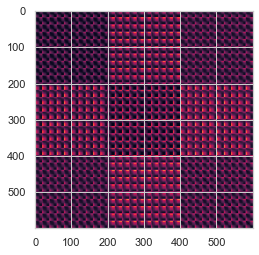

In [166]:
Dbhatsgd2=Dbhat_sgd
for i in range(number_of_models_2):
    for j in range(number_of_models_2):
        if j>i:
            Dbhatsgd2[i,j]=Dbhatsgd2[j,i]
plt.imshow(Dbhatsgd2)

In [167]:
## to embed define p matrix = 1 -delta ij / number of samples
P2=np.eye(number_of_models_2)-np.ones((number_of_models_2,number_of_models_2))/number_of_models_2
## covariance matric P.dskl.P
CovMat_bhat=-.5*np.matmul(np.matmul(P2,Dbhatsgd2),P2)
## eigen value decomposition

from numpy import linalg as LA
w_bhat,vt_bhat = LA.eig(CovMat_bhat)
metric_sig_bhat=np.sign(w_bhat.real)
print(w_bhat[0:15])
w_bhat = abs(w_bhat.real)
v_bhat = vt_bhat.T.real
projMatEigs_bhat = np.dot(v_bhat.T,np.diag(np.sqrt(w_bhat)))

[51.40309452  4.31191639  2.60181005  1.06111011 -0.97331479  0.8968096
  0.62910571  0.59147712  0.46593635  0.39352496  0.35547825  0.26155953
  0.24263226  0.21915919  0.20490771]


In [168]:
Dbhat_sgd.shape

(600, 600)

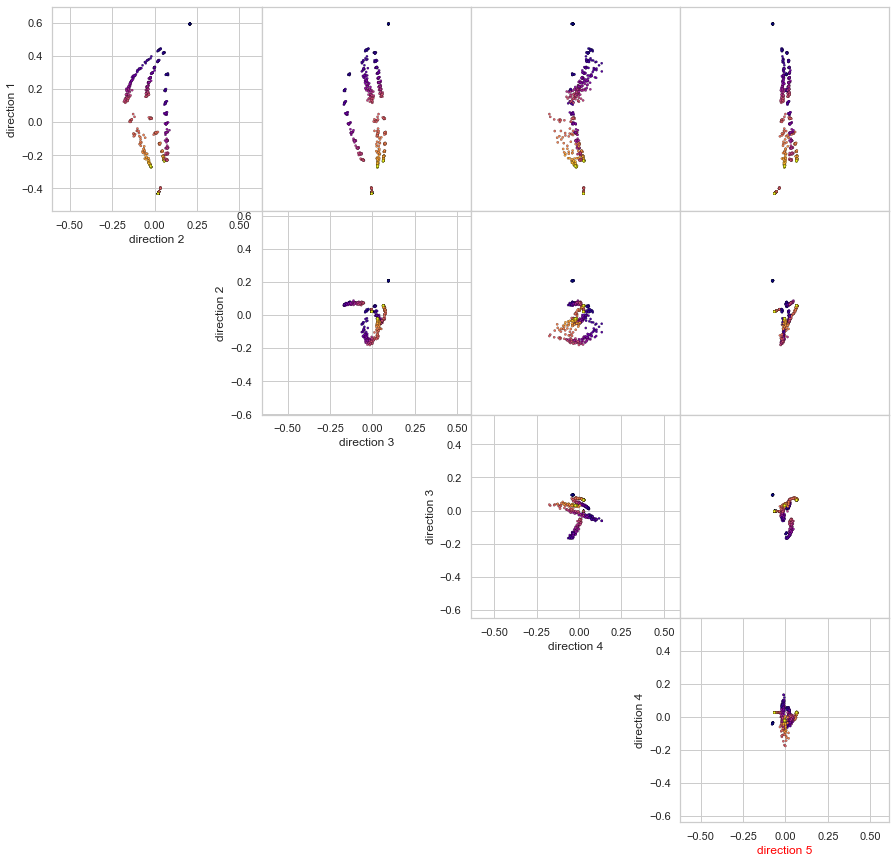

In [169]:
trianglePlot(projMatEigs_bhat,metric_sig_bhat,time_colors,dim=4)

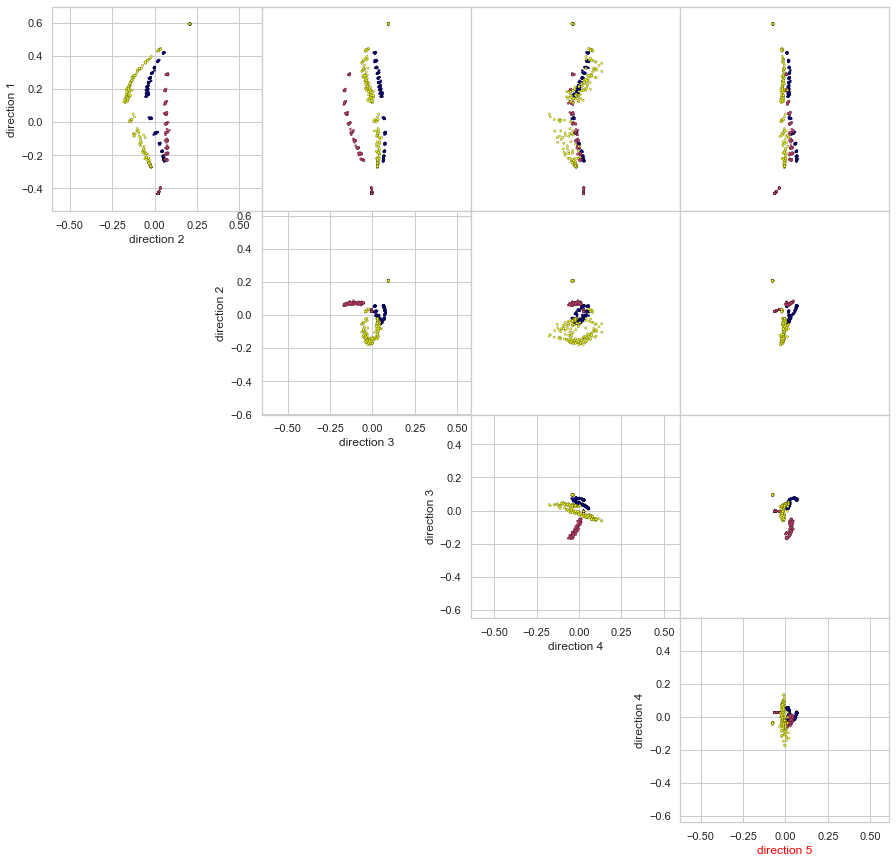

In [170]:
trianglePlot(projMatEigs_bhat,metric_sig_bhat,model_colors,dim=4)

Color by Model
Blue = cnn, Red = fc, Yellow = resnet


<IPython.core.display.Javascript object>


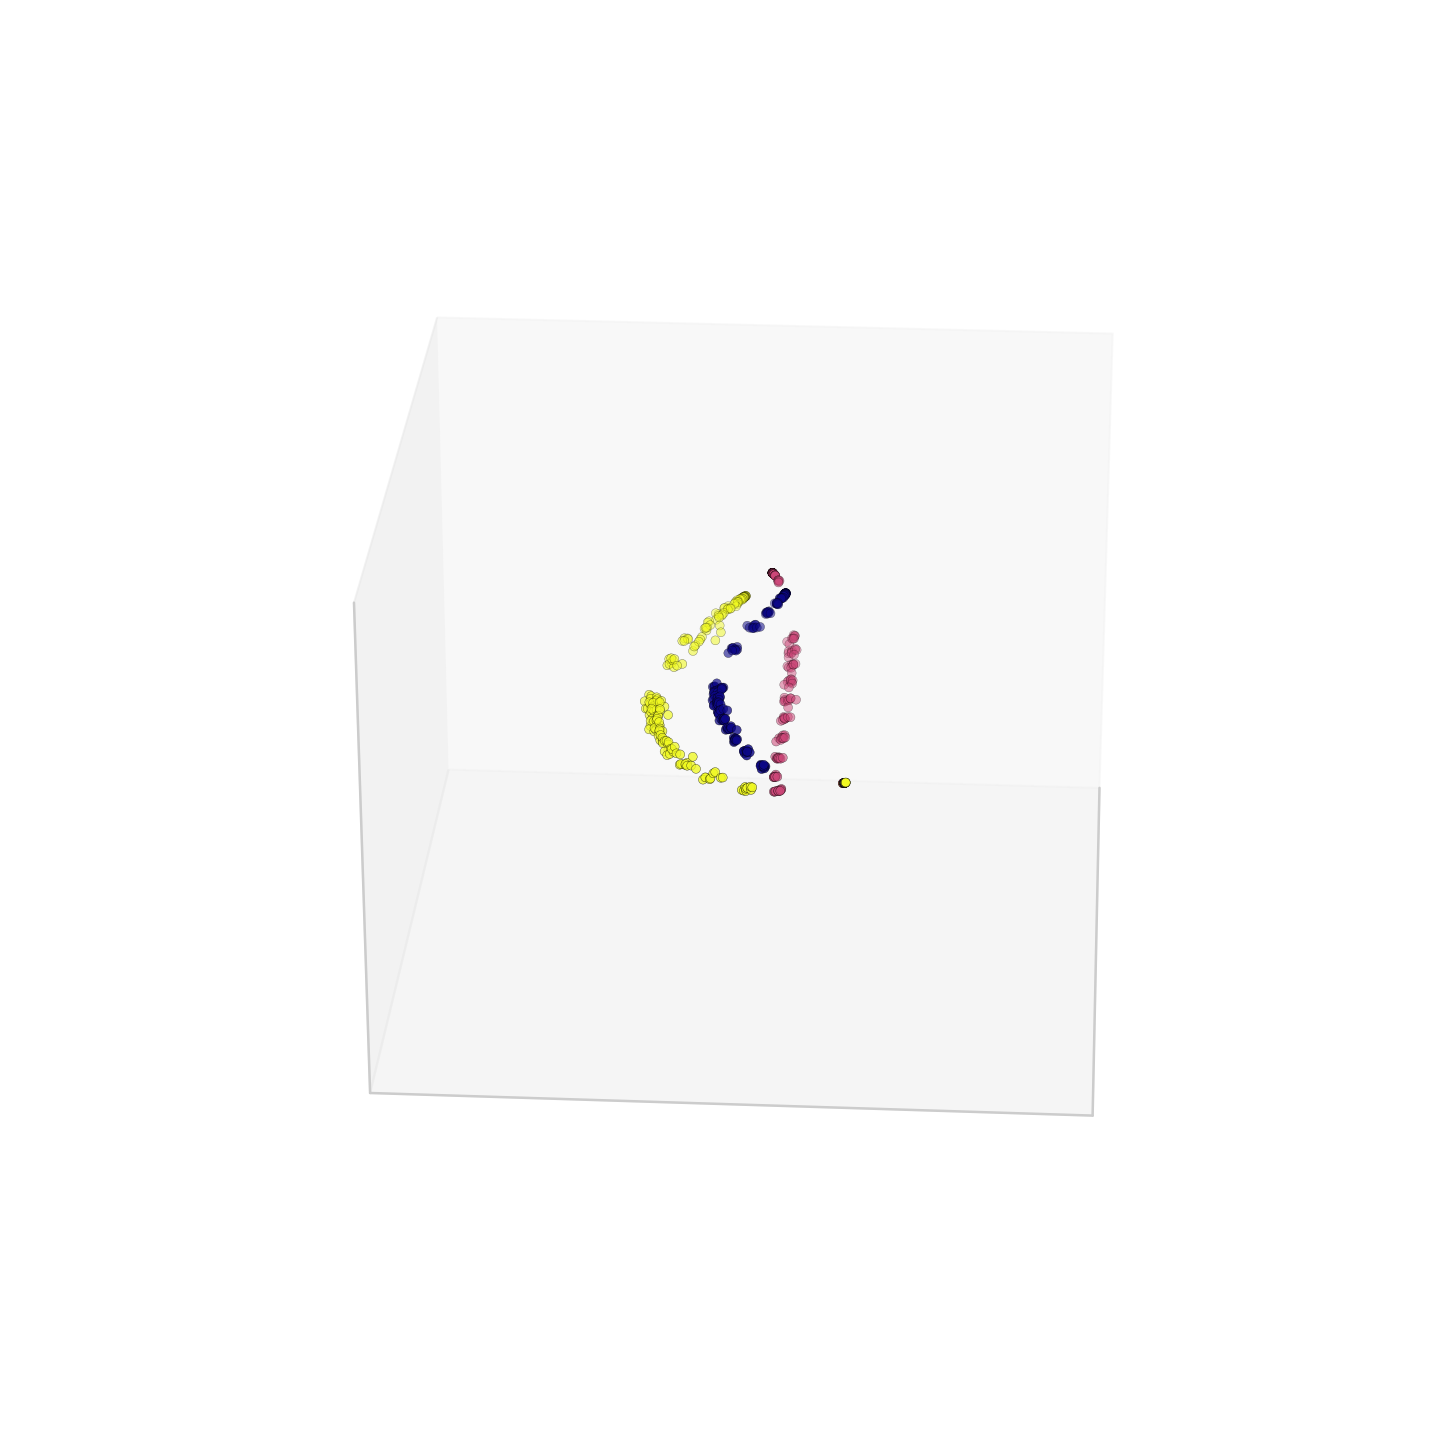

/Users/itaygr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


In [203]:
print('Color by Model')
print('Blue = cnn, Red = fc, Yellow = resnet')
%matplotlib notebook
#%matplotlib inline

plot3D(projMatEigs_bhat[:,0],projMatEigs_bhat[:,1],projMatEigs_bhat[:,2],model_colors,cmap='plasma',shadow=False,useCMAP = True)

Color by Model
Blue = cnn, Red = fc, Yellow = resnet


<IPython.core.display.Javascript object>


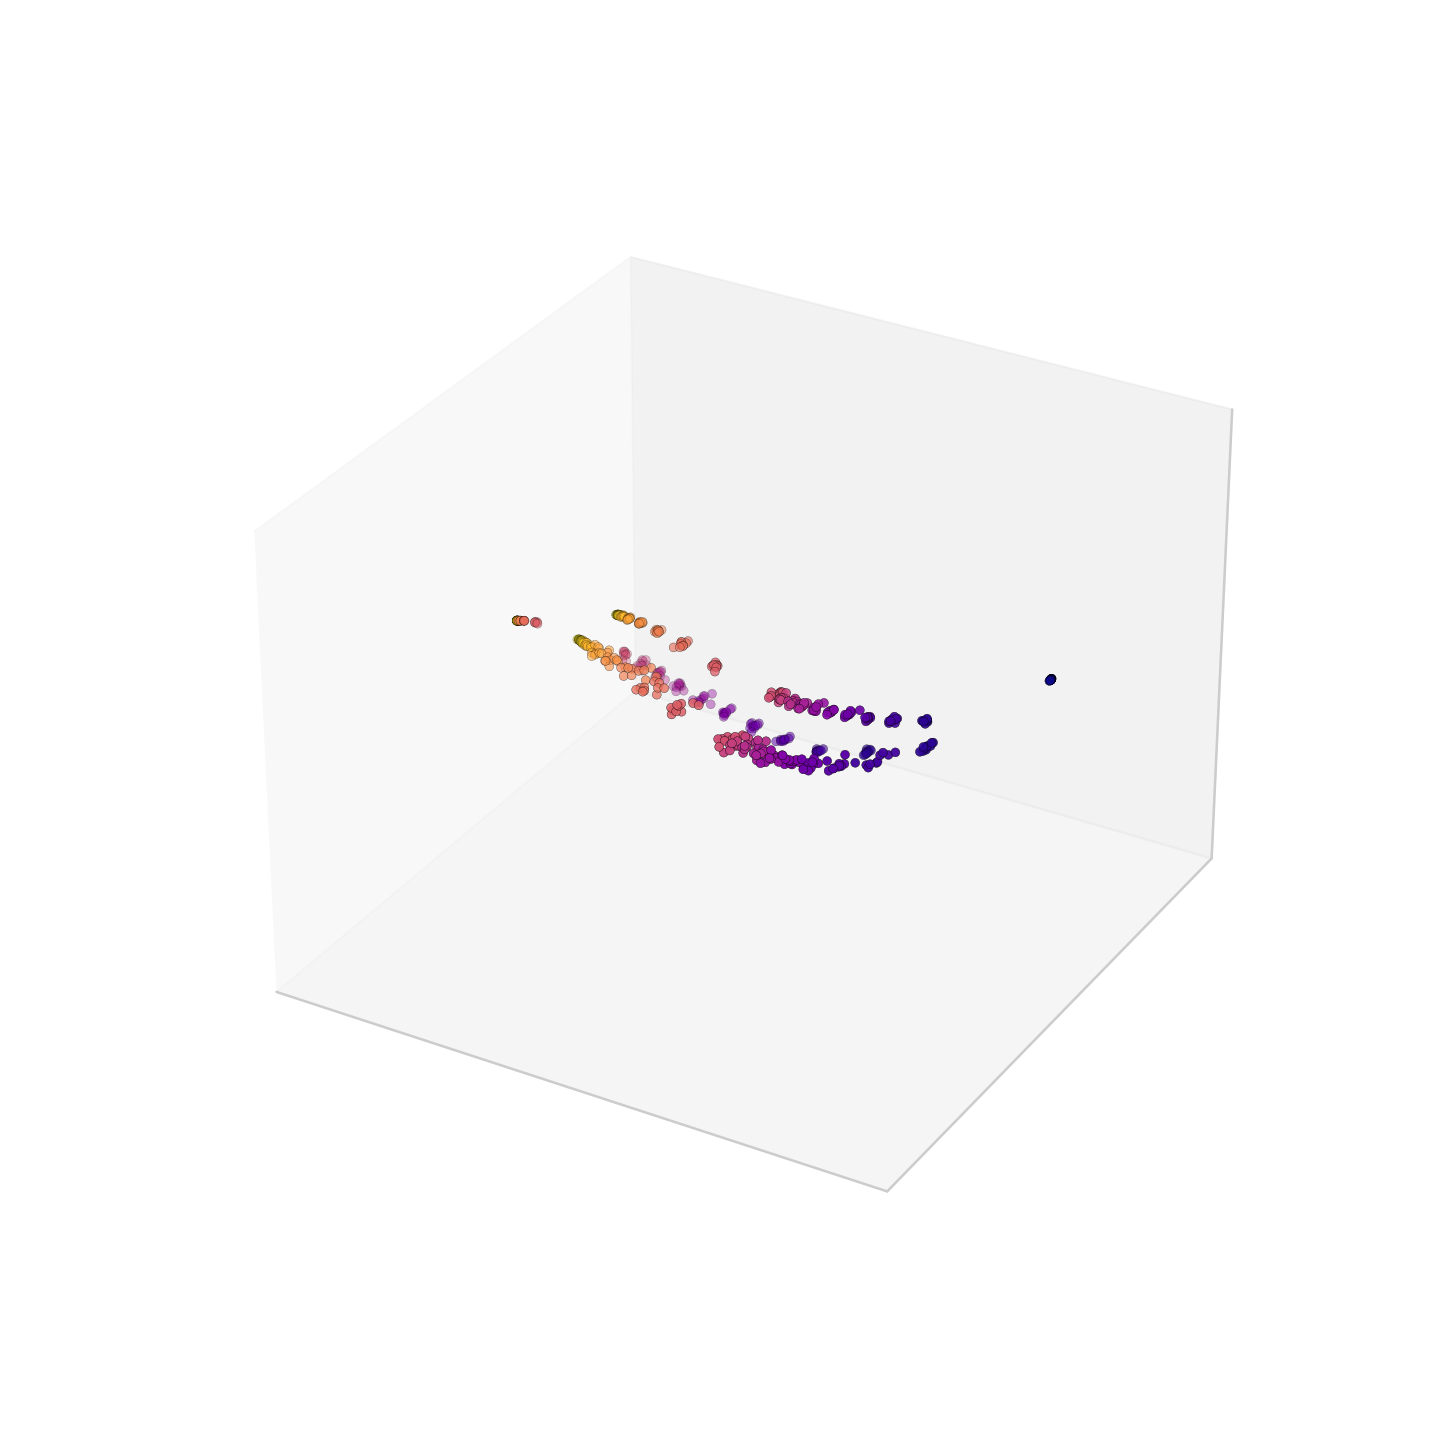

/Users/itaygr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


In [249]:
print('Color by Model')
print('Blue = cnn, Red = fc, Yellow = resnet')
%matplotlib notebook
#%matplotlib inline

plot3D(projMatEigs_bhat[:,0],projMatEigs_bhat[:,1],projMatEigs_bhat[:,2],time_colors,cmap='plasma',shadow=False,useCMAP = True)

## Add Geodesic path

In [182]:
num_sample = 50000
num_class = 10
truth_= np.zeros((num_sample,num_class))

for i in range(num_sample):
    truth_[i,ground_truth[i]] = 1

In [181]:
def linear_interp_ignorance_to_truth(lambda_,truth_,num_class):
    # lambda_ is a tuning param along the linearly interpolated path
    # grounnd truth is an array that contains the ground truth label of images nx1 array
    # randsample is an array of the indices sampled from N images
    # num_class is the number of labels 
    
    num_sample = truth_.shape[0]
    # create ignorance distributions
    ignorance_ = np.ones((num_sample,num_class))/num_class
    # compute dG
    dG = 2*np.arccos(np.sum(np.sqrt(ignorance_)*np.sqrt(truth_),1)).reshape(-1,1)
    # compute linear interpolation
    interp_ = np.sin((1-lambda_)*dG/2)*np.sqrt(ignorance_)/np.sin(dG/2) + np.sin(lambda_*dG/2)*np.sqrt(truth_)/np.sin(dG/2)
    return (interp_)**2

In [187]:
geodesic_path_dbhat=np.zeros(([10,600]))

count_lambda=0
for lambda_ in np.linspace(0,.9,10):
    for i_model1,model1 in zip(range(len(models)),models):
            for i_seed1,seed1 in zip(range(len(seeds)),seeds):
                for t1 in times:
                    i1=i_model1*len(seeds)*len(times)+i_seed1*len(times)+t1
                    p1=np.array(data0Tsgd[(data0Tsgd['m']==model1)&(data0Tsgd['seed']==seed1)&(data0Tsgd['t']==t1)]['yh'])[0]
                    p2=linear_interp_ignorance_to_truth(lambda_,truth_,10)
                    geodesic_path_dbhat[count_lambda,i1]=bhat(p1,p2)
    count_lambda+=1
                    
    

In [197]:
bhat_mean=np.mean(Dbhatsgd2,1)
bhat_mean_mean=np.mean(Dbhatsgd2)


In [211]:
vavg=np.matmul(P,geodesic_path_dbhat[1,:])-bhat_mean+bhat_mean_mean
np.sqrt(np.abs(w_bhat[0]))*np.dot(vt_bhat[:,0],vavg)

-45.3344944281188

In [418]:
def embed(dp,e_values,e_vectors,dist_list):
    d_mean=np.mean(dist_list,1)
    d_mean_mean=np.mean(dist_list)
    length=len(dp)
    P=np.eye(length)-np.ones((length,length))/length
    dp_mean=np.matmul(P,dp)-d_mean+d_mean_mean
    sqrtsigma=np.sqrt(np.abs(e_values))
    return sqrtsigma*np.matmul(dp_mean,e_vectors)

def embed_lazy(dp,dist_list,embed_dimension=3):
    e_values, e_vectors= np.linalg.eig(dist_list)
    e_values = e_values[:embed_dimension]
    e_vectors = e_vectors[:,:embed_dimension]
    d_mean=np.mean(dist_list,1)
    d_mean_mean=np.mean(dist_list)
    length=len(dp)
    P=np.eye(length)-np.ones((length,length))/length
    dp_mean=np.matmul(P,dp)-d_mean+d_mean_mean
    sqrtsigma=np.sqrt(np.abs(e_values))
    return sqrtsigma*np.matmul(dp_mean,e_vectors)
    

# Calculate the embedding of a distibution q in the intensive embedding of models p_list with divergence=distance, supply d_list the precalculated matrix of distances pf p_list.   
def embed_p_lazy(q,p_list,dist_list,distance=bhat,embed_dimension=3):
    length=p_list.shape[0]
    dp=np.zeros((length,))
    for i in range(length):
        dp[i]=distance(q,p_list[i,:])
    P=np.eye(length)-1/length
    d_mean=np.mean(dist_list,0)
    d_mean_mean=np.mean(dist_list)
    dist_list=-.5*np.matmul(P,np.matmul(dist_list,P))
    e_values, e_vectors= np.linalg.eig(dist_list)
    e_values = e_values[:embed_dimension]
    e_vectors = e_vectors[:,:embed_dimension]
    dp_mean=dp-np.mean(dp)-d_mean+d_mean_mean
    dp_mean=-.5*dp_mean#/np.sqrt(np.dot(dp_mean,dp_mean))
    sqrtsigma=np.sqrt(np.abs(e_values))
    #return ((1/sqrtsigma)*np.matmul(dp_mean,e_vectors),sqrtsigma,e_values,e_vectors,dp_mean)
    return ((1/sqrtsigma)*np.matmul(dp_mean,e_vectors))

    
    

In [410]:
#Sanity check
#p0_projected,sqrtsigma,e_values,e_vectors,dp_mean = embed_p_lazy(p_list[0],p_list,Dbhatsgd2)


In [421]:
q0=embed_p_lazy(p_list[0],p_list,Dbhatsgd2)

In [243]:
## create p list

data0Tsgd=data[0][(data[0]['bn']==True)&(data[0]['opt']=='sgd')]

number_of_models_2=len(models)*len(seeds)*len(times)
p_list=np.zeros((number_of_models_2,50000,10))         
for i_model1,model1 in zip(range(len(models)),models):
            for i_seed1,seed1 in zip(range(len(seeds)),seeds):
                for t1 in times:
                    i1=i_model1*len(seeds)*len(times)+i_seed1*len(times)+t1
                    p_list[i1,:,:]=np.array(data0Tsgd[(data0Tsgd['m']==model1)&(data0Tsgd['seed']==seed1)&(data0Tsgd['t']==t1)]['yh'])[0]


In [434]:
q_ignorance=linear_interp_ignorance_to_truth(0,truth_,10)
q_truth=linear_interp_ignorance_to_truth(1,truth_,10)
ignorance_embed=embed_p_lazy(q_ignorance,p_list,Dbhatsgd2)
truth_embed=embed_p_lazy(q_truth,p_list,Dbhatsgd2)

In [432]:
[q0,q_embed]

[array([0.59431344, 0.20760746, 0.09452018]),
 array([0.59442548, 0.20745262, 0.09437719])]

Color by Model
Blue = cnn, Red = fc, Yellow = resnet


/Users/itaygr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


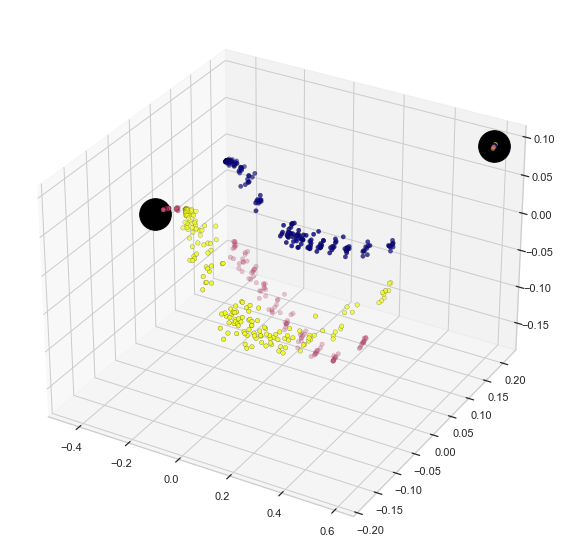

In [441]:
print('Color by Model')
print('Blue = cnn, Red = fc, Yellow = resnet')
#%matplotlib notebook
%matplotlib inline
#q=[[ -1.94832828, -86.40126402,   2.53178728]]
plot3D_v2(projMatEigs_bhat[:,0],projMatEigs_bhat[:,1],projMatEigs_bhat[:,2],model_colors ,[ignorance_embed,truth_embed],cmap='plasma',shadow=False,useCMAP = True)

Color by Model
Blue = cnn, Red = fc, Yellow = resnet


/Users/itaygr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


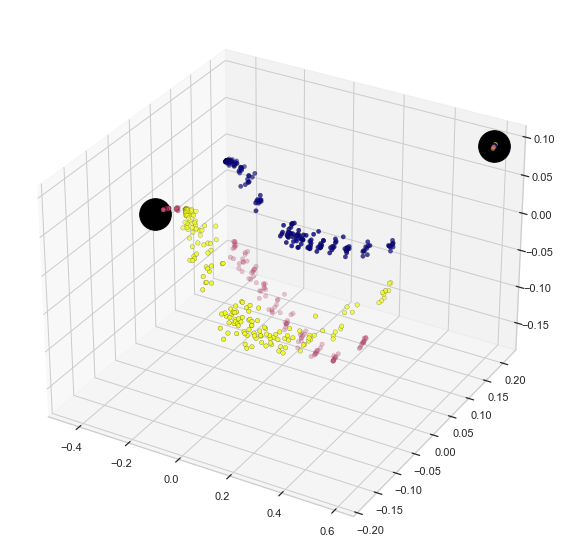

In [438]:
print('Color by Model')
print('Blue = cnn, Red = fc, Yellow = resnet')
#%matplotlib notebook
%matplotlib inline
#q=[[ -1.94832828, -86.40126402,   2.53178728]]
plot3D_v2(projMatEigs_bhat[:,0],projMatEigs_bhat[:,1],projMatEigs_bhat[:,2],model_colors ,[ignorance_embed,truth_embed],cmap='plasma',shadow=False,useCMAP = True)

In [273]:
def plot3D_v2(px,py,pz,clist,emphPoints = [],cmap='plasma',shadow=False,useCMAP = True):
    
    elev = 30
    azim = 60

    viewVect = [np.cos(np.pi*180/elev)*np.sin(np.pi*180/azim),np.cos(np.pi*180/elev)*np.cos(np.pi*180/azim),np.cos(np.pi*180/elev)]

    p = np.array([px,py,pz])
    dots = np.array(np.dot(viewVect,p))
    sort = dots.argsort()

    px = px[sort]
    py = py[sort]
    pz = pz[sort]
    clist = np.array(clist)[sort]

    mean_x = px.min()
    mean_y = py.min()
    mean_z = pz.min()

    Xdist = px.max() - px.min()
    Xcntr = (px.max() + px.min())/2.0
    Ydist = py.max() - py.min()
    Ycntr = (py.max() + py.min())/2.0
    Zdist = pz.max() - pz.min()
    Zcntr = (pz.max() + pz.min())/2.0

    dist = 0.6*max(Xdist,Ydist,Zdist)

    fig = plt.figure(figsize = (10,10))
    ax = fig.gca(projection='3d')
    #ax.view_init(30,-60)

    listTemp = [i for i in range(len(px))]

    if useCMAP:
        ax.scatter(px,py,pz,c=clist,edgecolor='black',linewidth=0.2,cmap = cmap)
    else:
        ax.scatter(px,py,pz,c=clist,edgecolor='black',linewidth=0.2)
    
    for p in emphPoints:
        ax.scatter(p[0],p[1],p[2],c='k',s=1000)

    #ax.set_xlim([Xcntr - dist, Xcntr + dist])
    #ax.set_ylim([Ycntr - dist, Ycntr + dist])
    #ax.set_zlim([Zcntr - dist, Zcntr + dist])

    #ax.set_xticks([])
    #ax.set_yticks([])
    #ax.set_zticks([])

    #ax.set_axis_off()
    #plt.show()
    
    if shadow:
        #fig = plt.figure(figsize = (10,10))
        #ax = fig.gca(projection='3d')
        #ax.view_init(30,-60)
        
        ax.scatter(px,py,[Zcntr - dist for p in pz],c='black',alpha=0.01)
        ax.scatter(px,[Ycntr + dist for p in py],pz,c='black',alpha=0.01)
        ax.scatter([Xcntr - dist for p in px],py,pz,c='black',alpha=0.01)

        ax.set_xlim([Xcntr - dist, Xcntr + dist])
        ax.set_ylim([Ycntr - dist, Ycntr + dist])
        ax.set_zlim([Zcntr - dist, Zcntr + dist])

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        #ax.set_axis_off()
    plt.show()
    
def trianglePlot(arry,metric_sig,clist,emphPoints = [],dim=2):
    
    ranges = [arry[:,idx].max()-arry[:,idx].min() for idx in range(dim+1)]
    axesDist = 0.6*max(ranges)
    
    figs,axs = plt.subplots(nrows=dim,ncols=dim,figsize=(15,15))
    for row in range(dim-1,-1,-1):
        for col in range(dim-1,-1,-1):
            if col >= row:
                py = arry[:,row]
                px = arry[:,col+1]
                
                centerX = (px.max()+px.min())/2
                centerY = (py.max()+py.min())/2
                
                sc1 = axs[row,col].scatter(px,py,s=5,c=clist,edgecolor='black',linewidth=0.2, cmap='plasma')
                for p in emphPoints:
                    axs[row,col].scatter([px[p]],[py[p]],s=100,c='C1',edgecolor='black',linewidth=0.2)
                
                axs[row,col].set_xlim([centerX-axesDist,centerX+axesDist])
                axs[row,col].set_ylim([centerY-axesDist,centerY+axesDist])
                if row != col:
                    axs[row,col].set_xticks([])
                    axs[row,col].set_yticks([])
                if row == col:
                    axs[row,col].set_ylabel('direction '+str(row+1))
                    axs[row,col].set_xlabel('direction '+str(col+2))
                    if metric_sig[row]<0:
                        axs[row,col].yaxis.label.set_color('red')
                    if metric_sig[col+1]<0:
                        axs[row,col].xaxis.label.set_color('red')
                axs[row,col].ticklabel_format(style='sci',scilimits=(-2,2),axis='both')
            else:
                axs[row,col].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [429]:
p_list[0]

array([[0.09850129, 0.09818336, 0.09844526, ..., 0.0982952 , 0.10333927,
        0.09803772],
       [0.0985534 , 0.0982362 , 0.09826785, ..., 0.09903181, 0.10361195,
        0.09786104],
       [0.09854456, 0.09814794, 0.09809177, ..., 0.0994588 , 0.10350913,
        0.09768371],
       ...,
       [0.09848157, 0.0982296 , 0.09810563, ..., 0.09957108, 0.10336339,
        0.09769948],
       [0.09873609, 0.09819882, 0.0981212 , ..., 0.09906071, 0.1039345 ,
        0.09771408],
       [0.0985596 , 0.09818751, 0.0983297 , ..., 0.09915979, 0.1035457 ,
        0.09792262]])